<a href="https://colab.research.google.com/github/ratimayy/ML/blob/main/k_mean_%E0%B8%A5%E0%B8%AD%E0%B8%87%E0%B8%97%E0%B8%B3%E0%B9%80%E0%B8%AD%E0%B8%87%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import plotly.express as px
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week14-kmeans/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.set_index('CustomerID', inplace=True)

print(df)

            Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40
...            ...  ...                 ...                     ...
196         Female   35                 120                      79
197         Female   45                 126                      28
198           Male   32                 126                      74
199           Male   32                 137                      18
200           Male   30                 137                      83

[200 rows x 4 columns]


In [13]:
# Encode 'Gender' column to binary
df['Gender_Male'] = (df['Gender'] == 'Male').astype(int)

# Drop the original 'Gender' column
df.drop(columns=['Gender'], inplace=True)

print(df)

            Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
CustomerID                                                              
1            19                  15                      39            1
2            21                  15                      81            1
3            20                  16                       6            0
4            23                  16                      77            0
5            31                  17                      40            0
...         ...                 ...                     ...          ...
196          35                 120                      79            0
197          45                 126                      28            0
198          32                 126                      74            1
199          32                 137                      18            1
200          30                 137                      83            1

[200 rows x 4 columns]


In [14]:
%matplotlib inline
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

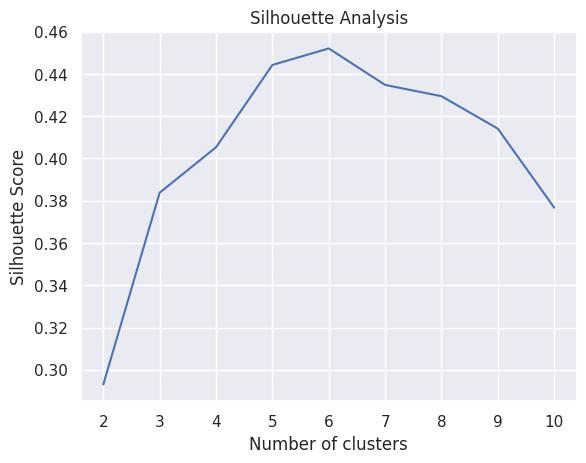

In [15]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


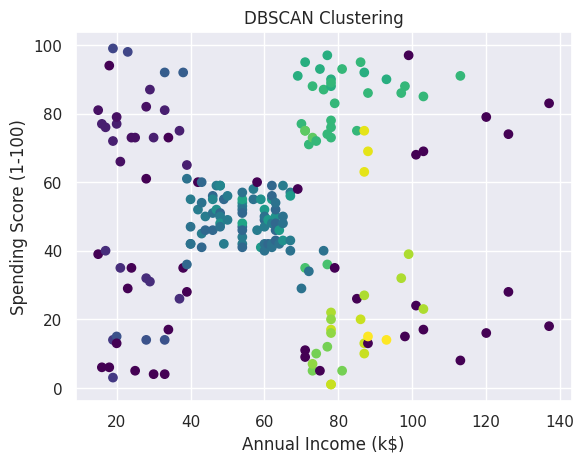

            Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
CustomerID                                                                 
1            19                  15                      39            1   
2            21                  15                      81            1   
3            20                  16                       6            0   
4            23                  16                      77            0   
5            31                  17                      40            0   
...         ...                 ...                     ...          ...   
196          35                 120                      79            0   
197          45                 126                      28            0   
198          32                 126                      74            1   
199          32                 137                      18            1   
200          30                 137                      83            1   

           

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # You may need to adjust the parameters
clusters = dbscan.fit_predict(scaled_features)

# Adding cluster labels to DataFrame
df['Cluster'] = clusters

# Visualizing the clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=clusters, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()

print(df)

In [18]:
# Count the number of clusters (excluding noise points)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print("Number of clusters (excluding noise points):", num_clusters)

# Count the number of noise points
num_noise_points = list(clusters).count(-1)
print("Number of noise points:", num_noise_points)


Number of clusters (excluding noise points): 24
Number of noise points: 37


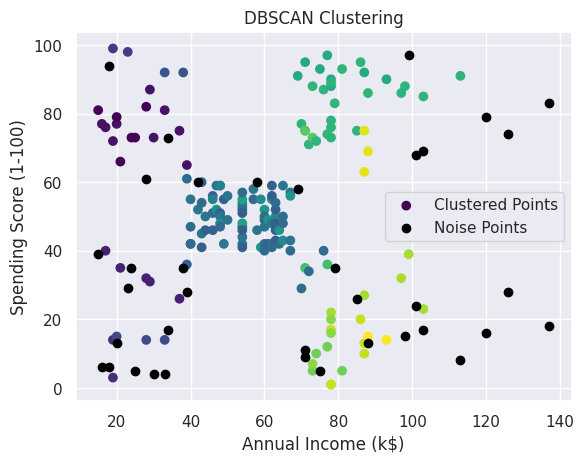

In [19]:
# Separate points by cluster and noise
clustered_points = df[df['Cluster'] != -1]
noise_points = df[df['Cluster'] == -1]

# Visualize clusters and noise points
plt.scatter(clustered_points['Annual Income (k$)'], clustered_points['Spending Score (1-100)'],
            c=clustered_points['Cluster'], cmap='viridis', label='Clustered Points')
plt.scatter(noise_points['Annual Income (k$)'], noise_points['Spending Score (1-100)'],
            c='black', label='Noise Points')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()
